Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Support vector machines

Support vector machines (SVM) are primarily used for classification problems.
They are similar to several models we've already discussed.
First, SVM is, like logistic regression, a binary classification technique.
Second, SVM is similar to logistic regression mathematically but with a penalty parameter much like ridge regression.
Finally, SVM flexibly allows both linear and nonlinear modeling, making it a lot like linear discriminant analysis in the linear case as well as the nonlinear case if we use something called **the kernel trick**.

It is important to note that the term "support vector machine" tends to be used generically to cover both linear and nonlinear cases, as well as both SVM for classification and for regression.

### What you will learn

In the sections that follow you will learn about support vector machines and how to use them in a classifier.  We will study the following:

- Linear SVM
- Hard vs. soft margins
- Multi-way classification
- Nonlinear SVM

### When to use support vector machines

Support vector machines have similar use cases to logistic regression when the SVM is linear.
Both models allow for easy interpretation of predictor variables.
Both models allow for a penalization parameter, though in logistic regression, this is more of an add-on (e.g. logistic lasso).
Where the two models differ is in their underlying rationale: SVM is geometric and logistic regression is probabilistic.
In general, when you are thinking of using one, you might want to consider also trying the other, especially if you have performance problems.
Nonlinear SVM is a very different model and is more comparable to decision trees.
Like decision trees, nonlinear SVM can fit nonlinear data.
If you are thinking of using a tree-like model (random forests, gradient boosting, etc.), you may also want to try nonlinear SVM.

## Linear SVM

### Intuition

The basic idea of binary classification is to draw a line between the datapoints belonging to two different classes.
Consider the data table in Figure 1, which has two predictor variables $X_i$ and a class label, and the associated scatterplot with shaded circles depicting class `1` and hollow circles depicting class `0`.

<!-- | $X_1$ | $X_2$ | Class |
|-------|-------|-------|
| 0.50  | 0.10  | 0     |
| 0.60  | 0.12  | 0     |
| 0.63  | 0.09  | 0     |
| 0.62  | 0.20  | 0     |
| 0.70  | 0.16  | 0     |
| 0.70  | 0.22  | 0     |
| 0.80  | 0.23  | 0     |
| 0.90  | 0.22  | 0     |
| 0.10  | 0.65  | 1     |
| 0.11  | 0.83  | 1     |
| 0.15  | 0.61  | 1     |
| 0.16  | 0.76  | 1     |
| 0.14  | 0.90  | 1     |
| 0.20  | 0.87  | 1     |
| 0.22  | 0.63  | 1     |
| 0.23  | 0.80  | 1     |
 -->


<table><tr>
<td> 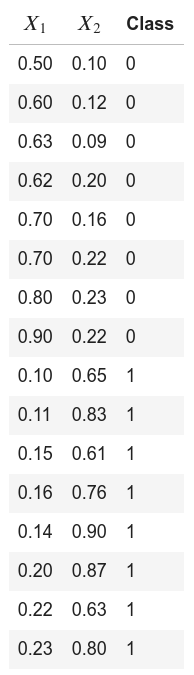 </td>
<td> 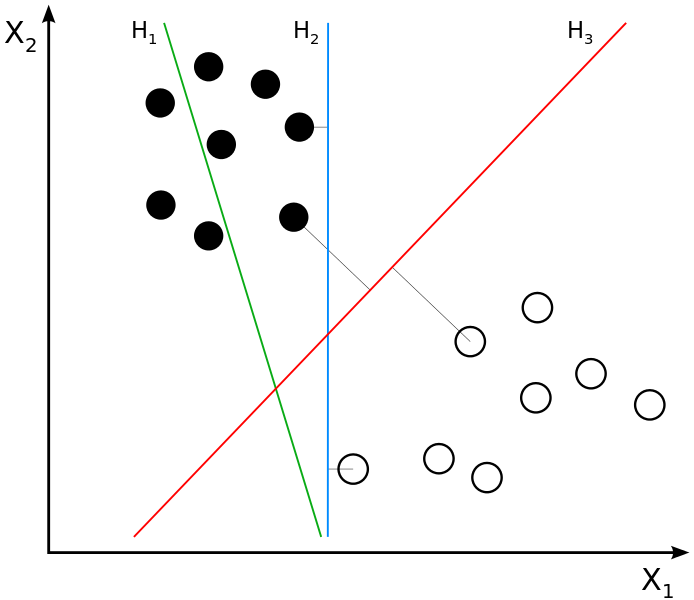 </td>
</tr></table>

<center><b>Figure 1. Data table and associated scatterplot showing possible decision boundaries between two classes.</b> Source: <a href="https://en.wikipedia.org/wiki/File:Svm_separating_hyperplanes_(SVG).svg">Wikipedia</a></center>

Figure 1 shows three possible decision boundaries through the datapoints, such that points to on side of the line (e.g. left) are classified `1` and the rest are classified `0`:

- $H_1$ is an example line with training error, because `1` is on both sides of the line, even though all `0` are to the right.
- $H_2$ is an example line with zero training error, because `1` and `0` are perfectly separated by the decision line
- $H_3$ is *another* example line with zero training error, but we intuitively prefer it because it **maximizes the distance between training points in both classes**

### Maximizing the margin

SVM build on this intuition: we would like to fit a line between the classes such that, if we padded it evenly on either side, it would touch points from both classes at the same time.
In SVM terminology, this padding is called **a margin**, and the goal of SVM is to fit a line **that maximizes the margin**.

Another way of thinking about this is blowing up a long straight ballon between the two classes until it touched points from both classes.
The direction of the balloon would be the direction of the decision boundary.

A trained linear SVM thus has an underlying linear form with parameters determined by maximizing the margin.
The datapoints on the boundary of the margin are called **support vectors** and are what give SVM its name.
An example fitted model (solid red), margins (dashed lines), and support vectors (dark outlined datapoints of both colors) is shown in Figure 2.

<!-- 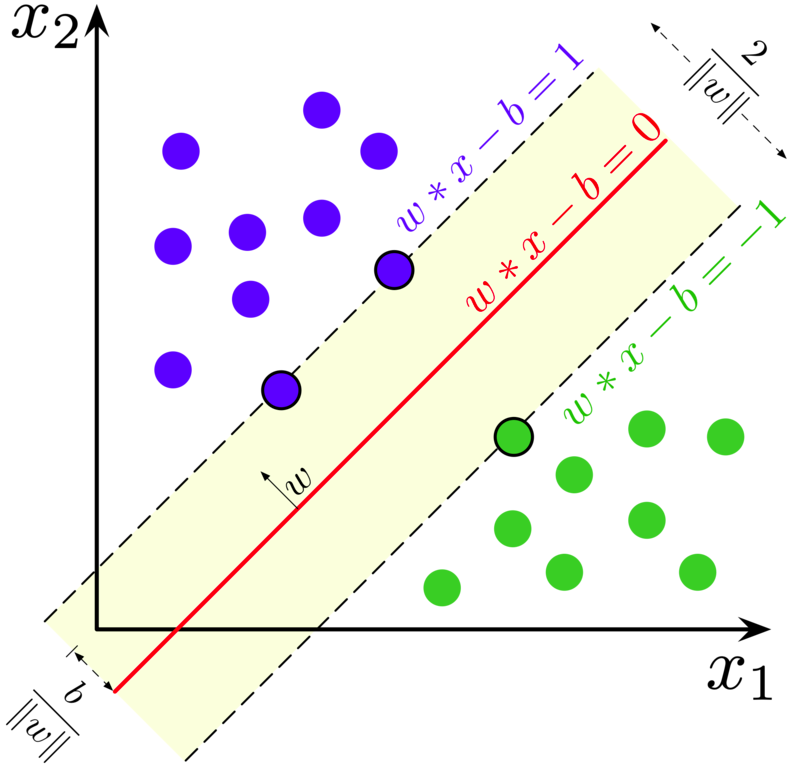 -->
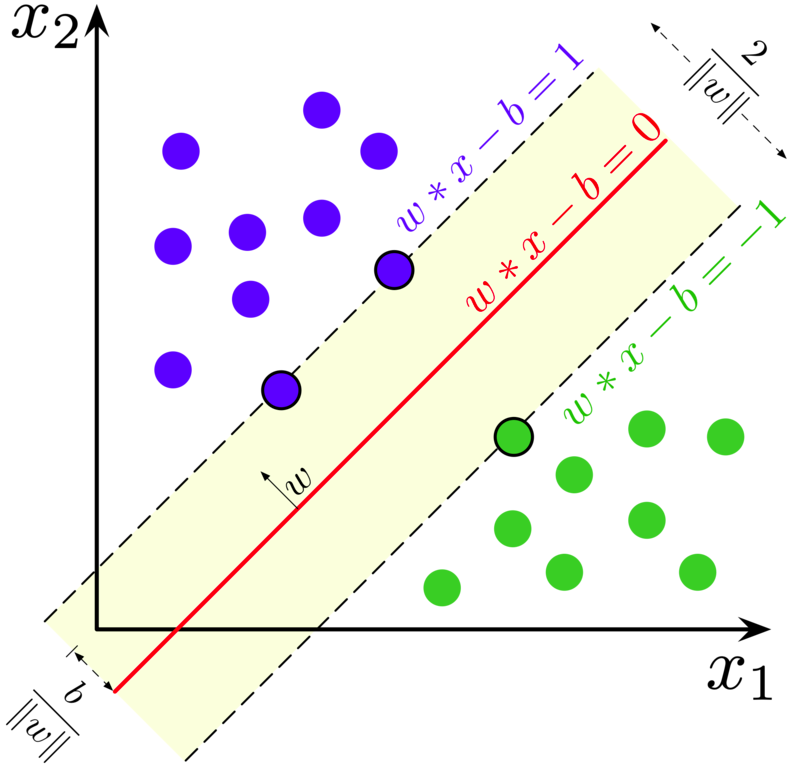
<center><b>Figure 2. Fitted SVM with decision boundary, margins, and support vectors indicated.</b> Source: <a href="https://en.wikipedia.org/wiki/File:SVM_margin.png">Wikipedia</a></center>

### Hard vs. soft margins

The fit in Figure 2 gives perfect performance on the training data because it is possible to draw a line between datapoints such that all datapoints on either side of the line belong to a single class.
When this is possible, the margin is called a **hard margin** because we did not have to relax the maximum margin constraint (as opposed to hard meaning difficulty).

However, often it is not possible to draw a perfect line like this, and the margin constraint must be relaxed.
When this happens, the margin become a **soft margin** analogous to the penalty parameter in ridge regression. 
The soft margin penalty tries to balance classification error with the "best" line, defined by the margin constraint.

### Beyond binary

While SVM is intrinsically binary, it is possible to construct N-way classifiers (i.e., more than 2 classes) by training multiple SVM models at once.
There are two common ways to train N-way SVM classifiers:

- **1 vs. 1** trains an SVM for each possible pair of classes, excluding the others. A new datapoint is run through all SVMs and given the class label it received most among the SVMs
- **1 vs. all** trains an SVM for each class, labeling the other classes as `0`. A new datapoint is run through all SVMs and given the class label which had the highest confidence among the SVMs.

Most software will take care of non-binary cases for you.

## Example: Linear SVM

### Load data

For this example, we'll use demographic and cardio measurement data to predict heart disease. 
There is no documentation for the meaning of the variables, so the descriptions below are approximate.

| Variable  | Type  | Description |
|:-----------|:-------|:-------------|
| Age       | Ratio | In years        |
| Sex       | Nominal | Sex, 1 = Male, 0 = Female        |
| ChestPain | Nominal | Chest pain experienced        |
| RestBP    | Ratio | Resting blood pressure        |
| Chol      | Ratio | Cholesterol in blood        |
| Fbs       | Nominal | Fasting blood sugar > 120 mg/dl, 1 = true; 0 = false          |
| RestECG   | Ordinal | resting electrocardiographic results         |
| MaxHR     | Ratio | Maximum heart rate        |
| ExAng     | Nominal |  Exercise induced angina, 1 = yes; 0 = no         |
| Oldpeak   | Ratio | ST depression induced by exercise relative to rest         |
| Slope     | Ordinal | The slope of the peak exercise ST segment         |
| Ca        | Ratio | Number of major vessels (0-3) colored by fluoroscopy         |
| Thal      | Nominal | Thal defect         |
| AHD       | Nominal | Atherosclerotic heart disease (class label)        |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/data.html">James et al. (2013)</a>.
</div>
<br>

The goal is to predict heart disease (`AHD`) using the other properties of the data.

Import `pandas` so we can load a dataframe:

- `import pandas as pd`

Load the dataframe:

- Create `dataframe` and set it to `with pd do read_csv using` a list containing
    - `"datasets/heart.csv"`
- `dataframe`

### Explore data

Let's check the data makes sense with the five figure summary:

- `with dataframe do describe using` 

This looks good, but are there missing values?

The easiest way is to remove them and see if anything changed:

- Set `dataframe` to `with dataframe do dropna using`
- `dataframe`

Comparing against the initial display of the dataframe, we can see we lost 6 rows.
Since it's such a small number, we probably don't need to `describe` the data again.

Let's do a few standard visualizations to better understand these data.

First import `plotly.express`:

- `import plotly.express as px`

Create a correlation matrix:

- Create `corr` and set to `with dataframe do corr using`

And show a correlation heatmap with row/column labels:

- `with px do imshow using` a list containing
    - `corr`
    - freestyle `x=` followed by `from corr get columns`
    - freestyle `y=` followed by `from corr get columns`

This time almost none of the measures are correlated with each other, except for 8 and 9, `Ca` and `Thal`.

We could do some more exploratory work here with scatterplots of the variables, but we don't expect to see very much if there are basically no correlations - unless of course there are nonlinear relationships.

We could also do histograms to see how the predictor variables are distributed if we wanted to.
This would potentially tell us if any of them had problematic distributions or outliers.

Let's skip those and do a histogram of the class label `AHD` since we would like to see how our classes are balanced. 

- `with px do histogram using` a list containing
    - `dataframe [ ]` with `"AHD"` inside

`Yes`/`No` heart disease are approximately balanced, with `No` being slightly more common, ~53% of the total data.

### Prepare train/test sets

First we need to separate our predictors (`X`) from our class label (`Y`), putting each into its own dataframe:

- Create `X` and set to `with dataframe do drop using` a list containing
    - freestyle `columns=["AHD"]`
- Create `Y` and set to `dataframe [ ]` containing a list with `"AHD"` inside

We need an extra step here.
As we've previously discussed, not all models can handle nominal variables.
This particular dataset has nominal variables for both the predictors and class label.
For the predictors, we want to create dummies *without* a reference level, but for the class label, we want to create dummies *with* a reference label.

Let's start with `X`:

- Set `X` to `with pd do get_dummies using` a list containing
    - `X`
- `X` (so you can see what happened)


As you can see, every possible value or *level* of the nominal variables in `X` got its own dummy column, with a `1` indicating when the level was present and a `0` otherwise.

Let's do the same for `Y` but use `drop_first=True` to use a reference level:

- Set `Y` to `with pd get_dummies using` a list containing
    - `Y`
    - freestyle `drop_first=True`
- `Y` (so you can see what happened)

As you can see, only 1 column was created where `Yes` was present, which is exactly what we want for a binary class label.

We're now ready to split the data into train/test sets, so import `sklearn.model_selection`:

- `import sklearn.model_selection as model_selection`

And do the actual split:

- Create `splits` and set to `with model_selection do train_test_split` using a list containing
    - `X`
    - `Y`
    - freestyle `random_state=1`
    
Setting random_state will make our results match each other.

### Fit model

We need to import libraries for:

- SVM
- Metrics
- Ravel

As well as libraries we need to standardize:

- Scale
- Pipeline

**NOTE: SVM is very sensitive to standardization!**

So do the following imports:

- `import sklearn.svm as svm`
- `import sklearn.metrics as metrics`
- `import numpy as np`
- `import sklearn.preprocessing as pp`
- `import sklearn.pipeline as pipe`

We're going to make a pipeline so we can scale and train in one step:

- Create variable `linearSVM`
- Set it to `with pipe do make_pipeline using` a list containing
    - `with pp create StandardScaler using`
    - `with svm create LinearSVC using` a list containing
        - freestyle `random_state=1`
        
**Note**: `sklearn` uses a regularization parameter `C` that controls how hard or soft the margin is; by default, it is set to `1`.

We can treat the whole pipeline as a classifier and call `fit` on it:

-  `with linearSVM do fit using` a list containing
    - `in list splits get # 1` (this is Xtrain)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (this is Ytrain)

And finally, get predictions:

- Create `predictions`
- Set it to `with linearSVM do predict using` a list containing
    - `in list splits get #2` (this is Xtest)

### Evaluate the model

Get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

And get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    

Performance is reasonably good, though we can see that it is a bit better for `0`, the more frequent class.

### Visualizing

#### Feature importance

Because linear SVM uses a line as a model, we can visualize feature importance using the coefficients.

To create bar chart of feature importances:

- `with px do bar using` a list containing
    - freestyle `x=` followed by `from X get columns`
    - freestyle `y=np.ravel(linearSVM[1].coef_)`
    
**Note:** `linearSVM[1]` is the linear SVM stage of the pipeline (`linearSVM[0]` is the scaler stage).

The most important features (absolute value) are:

- Ca: Number of major vessels (0-3) colored by fluoroscopy
- Sex: Male
- Fbs: Fasting blood sugar < 120 mg/dl 
- Oldpeak: ST depression induced by exercise relative to rest
- RestBP: Resting blood pressure

These seem to make sense, but it would take additional medical knowledge to know for sure.

## Nonlinear SVM

We've already talked about how some datasets may not be perfectly separable by a line, and so need a soft margin, but there are some problems that simply aren't linear at all.

Consider the plot on the left hand side of Figure 3.
One class only exists in the orange circle, and the other class only exists outside it.
There is no line that could be drawn through the datapoints that would do well.

Now consider the plot on the right hand side of Figure 3.
*This is the same data*, but projected into the third dimension using $z = a^2 + b^2$.
In other words, the new "up" dimension on the right hand side is just the sum of the squared coordinates on the "bottom" of the plot.
Because the original coordinates in the circle are small when squared and added together, they are "lower" in the plot on the right, and the coordinates outside the circle are "higher".
In fact, we could cut a plane between the two classes in the right hand plot as a result of this transformation.

This is the key idea of nonlinear SVM: **transform the data into a new space where the classes are linearly separable, then solve like regular SVM.**
The function we use to transform the data is called a **kernel**, and there are many possible kernels.
The "kernel trick" is a way of doing this efficiently on a computer using some interesting ideas from math.

<!-- 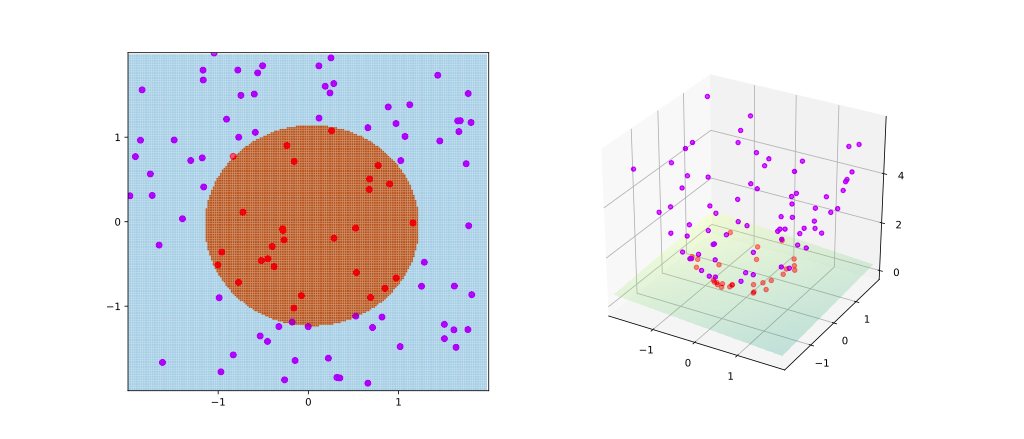 -->
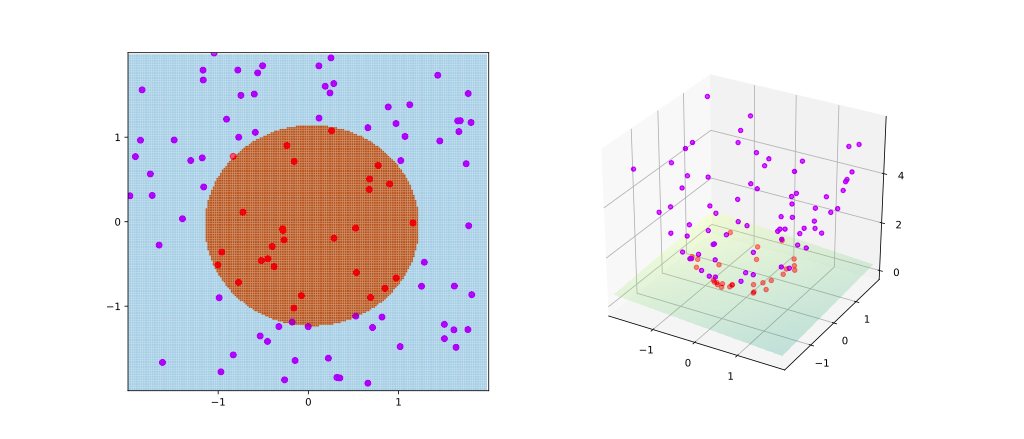
<center><b>Figure 3. A training example of SVM with kernel given by $φ((a, b)) = (a, b, a^2 + b^2)$.</b> Source: <a href="https://en.wikipedia.org/wiki/File:Kernel_trick_idea.svg">Wikipedia</a></center>

From a practical standpoint, the only different thing about nonlinear SVM is what kernel to choose.

## Example: Nonlinear SVM

We'll use the same `heart` data as before, and compare our results to the linear SVM

### Fit model

We're going to make a pipeline so we can scale and train in one step:

- Create variable `nonlinearSVM`
- Set it to `with pipe do make_pipeline using` a list containing
    - `with pp create StandardScaler using`
    - `with svm create SVC using` a list containing
        - freestyle `random_state=1`
        - freestyle `kernel="rbf"` (for a radial basis function kernel, like Figure 3)
        
**Note**: `sklearn` uses a regularization parameter `C` that controls how hard or soft the margin is; by default, it is set to `1`.

We can treat the whole pipeline as a classifier and call `fit` on it:

-  `with nonlinearSVM do fit using` a list containing
    - `in list splits get # 1` (this is Xtrain)
    - `with np do ravel using` a list containing
        - `in list splits get # 3` (this is Ytrain)

And finally, get predictions:

- Get `predictions` (you created it earlier)
- Set it to `with nonlinearSVM do predict using` a list containing
    - `in list splits get #2` (this is Xtest)

### Evaluate the model

Get the accuracy:

- `with metrics do accuracy_score using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`

And get the recall and precision:

- `print with metrics do classification_report using` a list containing
    - `in list splits get # 4`  (this is `Ytest`)
    - `predictions`
    

Performance is 1% higher than linear SVM, and is again a bit better for `0`, the more frequent class.

## What about `C`, the regularization term?

We haven't adjusted `C`, i.e. using a freestyle like `C=2.0` when fitting the model.
Like several other parameters we have encountered (K in KNN, regularization terms for lasso/ridge regression, the number of models when boosting), this is a parameter that ideally is found from the data itself.
We'll talk more about methods for this later on.